In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from Code.descent_methods import *
from Code.utilities import MSE_grad, train_test_split, plot_test_results, MSE_grad, MSELoss
# Import tools from the first project 
from Code.project1_tools import feature_matrix_2d, r2_sampling

import numpy as np

In [2]:
# Initialise beta
num_features = 5
beta0 = {"b" : np.random.random(num_features)}

# Sample points and split in train and test
num_points = 5
data = r2_sampling(num_points, sigma2=0.3)
x, y, z = data["x"], data["y"], data["z"]
X = feature_matrix_2d(x, y, num_features)
X_train, y_train, X_test, y_test, test_index = train_test_split(X, z, 0.2)
m = int(len(y_train) / 10) # Number of of minibatch when using batch size 10
epochs = 50

# Define the polynomial fit model
def model(beta, X):
    # print(beta)
    return np.dot(X, beta["b"])

loss_func = lambda beta, X, y : MSELoss(y, model(beta, X))
def loss_grad(beta, X, y):
    gradients = {}
    for key in beta.keys():
        gradients[key] = MSE_grad(model)(beta, X, y)
    return gradients



# = lambda beta, X, y : { key : MSE_grad(model)(beta, X, y) for key in beta.keys()}



# print(np.dot(X_train.T, model(beta0, X_train) - y_train))



print(X_train)
print(y_train)
print(beta0)
print(loss_grad(beta0, X_train, y_train))

[[1.         0.79919188 0.0602948  0.63870766 0.04818711]
 [1.         0.41942282 0.28319629 0.1759155  0.11877898]
 [1.         0.63740253 0.30169716 0.40628198 0.19230253]
 [1.         0.97391597 0.34678416 0.94851232 0.33773863]]
[[-0.80848001]
 [ 0.13610614]
 [ 0.86679817]
 [-0.39823469]]
{'b': array([0.35196167, 0.45499883, 0.61234148, 0.25487541, 0.98315322])}
{'b': array([[2.0272657 , 1.85755696, 2.340575  , 3.26439304],
       [1.57435661, 1.45429051, 1.79601771, 2.44960354],
       [0.42087278, 0.37878619, 0.49857133, 0.72767183],
       [1.30323029, 1.21118801, 1.47315496, 1.9741917 ],
       [0.33079933, 0.30122727, 0.38539404, 0.54637101]])}


### Plain GD

In [3]:
result_GD = GD(X_train, y_train, X_test, y_test, grad_method=loss_grad, n_epochs=epochs*10, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_GD["test_loss_list"], result_GD["train_loss_list"], 1)

0.0 

 [0. 0. 0. 0. 0.] 

 [[0.00506816 0.00464389 0.00585144 0.00816098]
 [0.00393589 0.00363573 0.00449004 0.00612401]
 [0.00105218 0.00094697 0.00124643 0.00181918]
 [0.00325808 0.00302797 0.00368289 0.00493548]
 [0.000827   0.00075307 0.00096349 0.00136593]]


ValueError: Incompatible shapes for broadcasting: shapes=[(5,), (5, 4)]

### Stochastic

In [ ]:
result_SGD = SGD(X_train, y_train, X_test, y_test, grad_method=loss_grad,n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_SGD["test_loss_list"], result_SGD["train_loss_list"], m)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Adagrad

In [ ]:
result_adagrad = SGD_adagrad(X_train, y_train, X_test, y_test, grad_method=loss_grad, n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_adagrad["test_loss_list"], result_adagrad["train_loss_list"], m)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### RMS prop

In [ ]:
result_RMS_prop = SGD_RMS_prop(X_train, y_train, X_test, y_test, grad_method=loss_grad,n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_RMS_prop["test_loss_list"], result_RMS_prop["train_loss_list"], m)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Adam

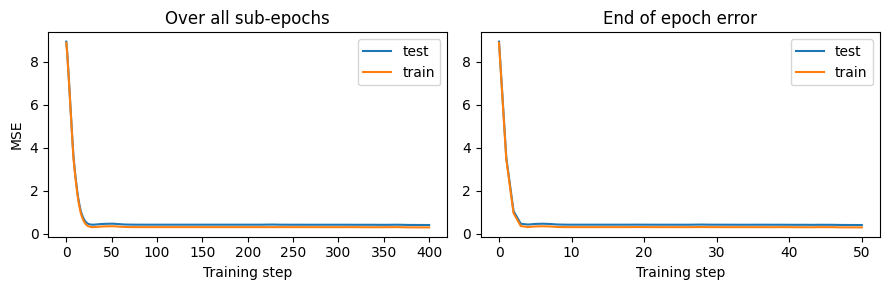

In [ ]:
result_adam = SGD_adam(X_train, y_train, X_test, y_test, grad_method=loss_grad,n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_adam["test_loss_list"], result_adam["train_loss_list"], m)